In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Info
Data obtained from the link : https://www.kaggle.com/carrie1/ecommerce-data

In [2]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preprocessing
## Data Cleansing

In [4]:
def change_to_str(data):
    if pd.isna(data):
        return 'Unknown'
    data = str(int(data))
    return data
df['CustomerID'] = df['CustomerID'].apply(change_to_str)

In [5]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Exploaratory Data Analysis (EDA)

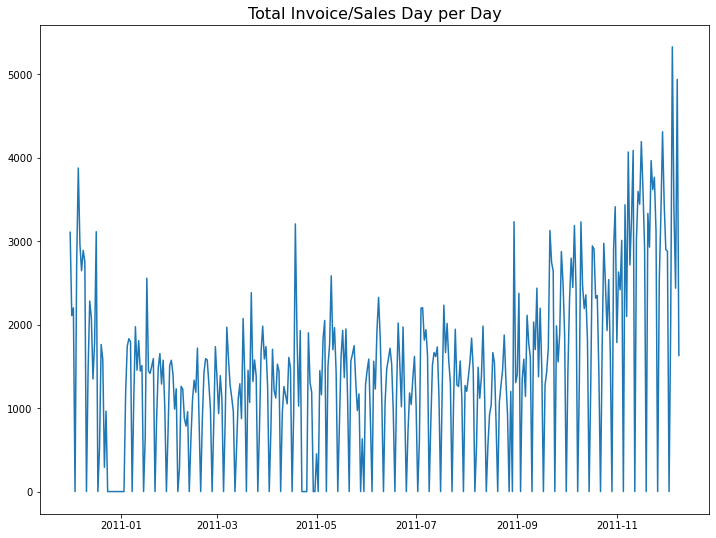

In [8]:
df_index_InvoiceDate = df.set_index('InvoiceDate')

daily_count_invoice = df_index_InvoiceDate.InvoiceNo.resample('D').count()
monthly_count_invoice = df_index_InvoiceDate.InvoiceNo.resample('M').count()

plt.figure(figsize=(12,9))
plt.plot(daily_count_invoice.index, daily_count_invoice.values)
plt.title('Total Invoice/Sales Day per Day', fontsize=16)
plt.show()

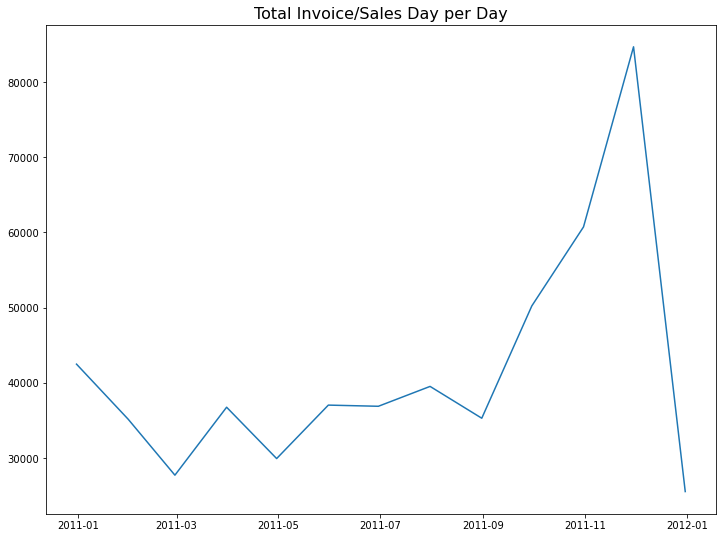

In [9]:
plt.figure(figsize=(12,9))
plt.plot(monthly_count_invoice.index, monthly_count_invoice.values)
plt.title('Total Invoice/Sales Day per Day', fontsize=16)
plt.show()

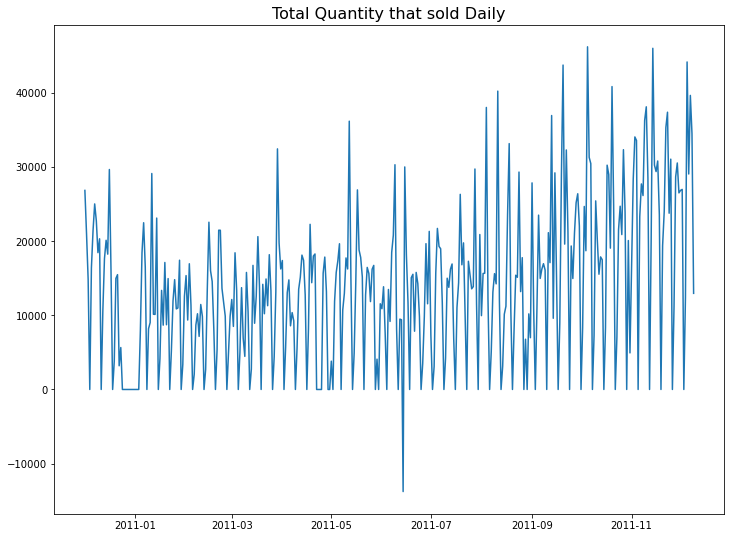

In [10]:
daily_quantity = df_index_InvoiceDate.Quantity.resample('D').sum()

plt.figure(figsize=(12,9))
plt.plot(daily_quantity.index, daily_quantity.values)
plt.title('Total Quantity that sold Daily', fontsize=16)
plt.show()

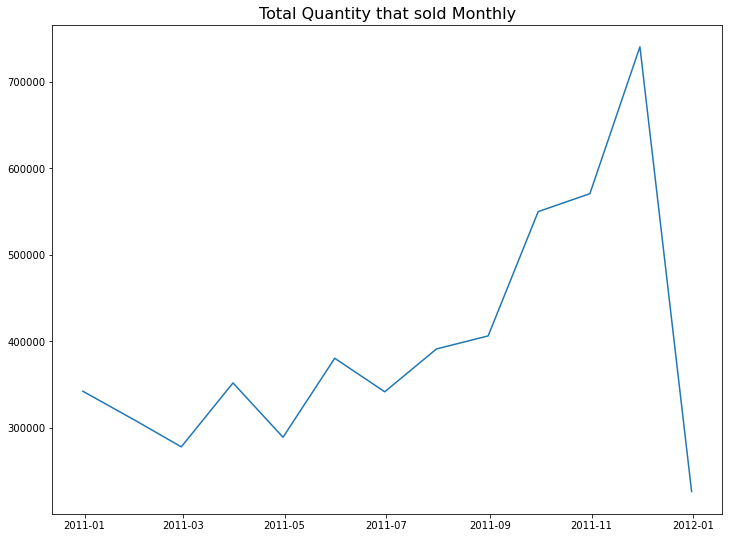

In [11]:
monthly_quantity = df_index_InvoiceDate.Quantity.resample('M').sum()

plt.figure(figsize=(12,9))
plt.plot(monthly_quantity.index, monthly_quantity.values)
plt.title('Total Quantity that sold Monthly', fontsize=16)
plt.show()

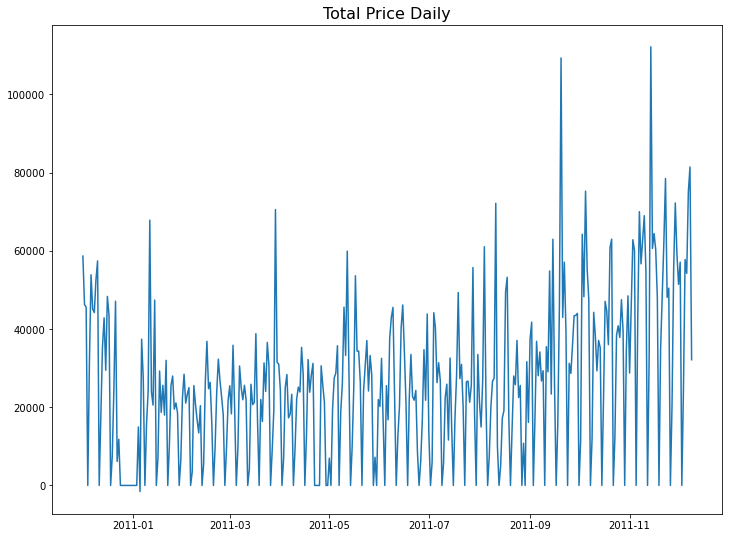

In [12]:
total_sales_daily = df_index_InvoiceDate['TotalSales'].resample('D').sum()

plt.figure(figsize=(12,9))
plt.plot(total_sales_daily.index, total_sales_daily.values)
plt.title('Total Price Daily', fontsize=16)
plt.show()

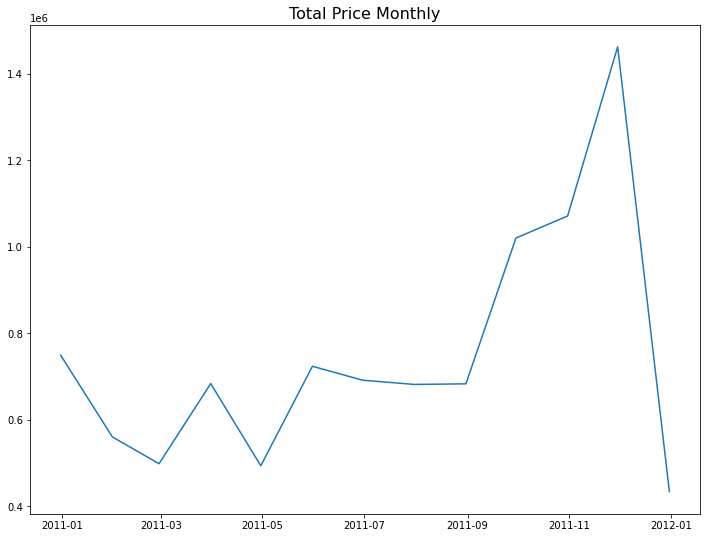

In [13]:
total_sales_monthly = df_index_InvoiceDate['TotalSales'].resample('M').sum()

plt.figure(figsize=(12,9))
plt.plot(total_sales_monthly.index, total_sales_monthly.values)
plt.title('Total Price Monthly', fontsize=16)
plt.show()

In [14]:
len(df['StockCode'].unique())

4070

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   TotalSales   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [16]:
data = df[['StockCode', 'Quantity', 'UnitPrice', 'Country', 'TotalSales']]
data

,StockCode,Quantity,UnitPrice,Country,TotalSales
0,85123A,6,2.55,United Kingdom,15.30
1,71053,6,3.39,United Kingdom,20.34
2,84406B,8,2.75,United Kingdom,22.00
3,84029G,6,3.39,United Kingdom,20.34
4,84029E,6,3.39,United Kingdom,20.34
...,...,...,...,...,...
541904,22613,12,0.85,France,10.20
541905,22899,6,2.10,France,12.60
541906,23254,4,4.15,France,16.60
541907,23255,4,4.15,France,16.60


In [17]:
data.drop_duplicates(inplace=True)

/Users/alifvianmarco/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'O':
        data[i] = encoder.fit_transform(data[i])

/var/folders/83/mld15jnn3h1d799j7vynwvq80000gn/T/ipykernel_14687/2623234181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.fit_transform(data[i])


## Splitting Data

In [25]:
scaler = StandardScaler()
X = data.drop('TotalSales', axis=1)
y = data['TotalSales']

X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

## Train Model

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train Score : {}'.format(lr.score(X_train, y_train)))

Train Score : 0.7883907547714271


In [27]:
y_pred = lr.predict(X_test)

In [28]:
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE :  50.799732235404164
MSE :  514.3478953288662
